📂 Please upload your COVER image


Saving bird-color64.jpeg to bird-color64.jpeg
📂 Please upload your SECRET image


Saving bird 64.jpg to bird 64.jpg
✅ Cover shape: (8, 8), Secret shape: (8, 8)

📊 Quantum Steganography Results
----------------------------------
PSNR (dB): 51.01
MSE: 0.5156
Embedding Capacity: 1.00 bits/pixel
----------------------------------


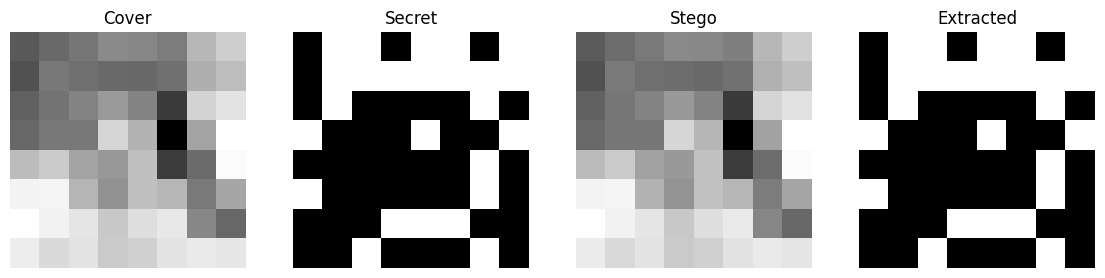

✅ Images saved to 'quantum_output/' folder.


In [ ]:
# ===============================================================
# Quantum-Inspired NEQR Steganography (Google Colab Version)
# Upload cover & secret images, auto processes and shows results
#  Suitable for M.Tech Quantum Image Work
# ===============================================================

from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
import math, os
from math import log2
from PIL import Image

# ---------- Upload images in Colab ----------
print("📂 Please upload your COVER image")
cover_upload = files.upload()
cover_path = list(cover_upload.keys())[0]

print("📂 Please upload your SECRET image")
secret_upload = files.upload()
secret_path = list(secret_upload.keys())[0]

# ---------- Utility functions ----------
def create_neqr_statevector(pixel_block, q_bits):
    H = pixel_block.shape[0]
    assert H == pixel_block.shape[1], "Block must be square"
    n = int(round(log2(H)))
    p_bits = 2 * n
    total_qubits = q_bits + p_bits
    N = 2 ** total_qubits
    state = np.zeros(N, dtype=complex)
    amp = 1 / (2 ** n)
    for y in range(H):
        for x in range(H):
            pos_index = y * H + x
            color_val = int(pixel_block[y, x])
            basis_index = (color_val << p_bits) | pos_index
            state[basis_index] = amp
    return state, {'n': n, 'p_bits': p_bits, 'q_bits': q_bits, 'H': H}

def reconstruct_pixels_from_statevector(state, meta):
    H, p_bits, q_bits = meta['H'], meta['p_bits'], meta['q_bits']
    pixels = np.zeros((H, H), dtype=int)
    for pos_index in range(2**p_bits):
        for color in range(2**q_bits):
            idx = (color << p_bits) | pos_index
            if np.abs(state[idx]) > 1e-12:
                y, x = divmod(pos_index, H)
                pixels[y, x] = color
                break
    return pixels

def embed_secret_lsb_on_statevector(state, meta, secret_bits_flat):
    p_bits, q_bits, H = meta['p_bits'], meta['q_bits'], meta['H']
    positions = 2**p_bits
    state2 = state.copy()
    for pos_index in range(min(positions, len(secret_bits_flat))):
        sbit = int(secret_bits_flat[pos_index] & 1)
        max_amp, current_color = 0.0, 0
        for color in range(2**q_bits):
            idx = (color << p_bits) | pos_index
            amp = np.abs(state2[idx])
            if amp > max_amp:
                max_amp, current_color = amp, color
        current_lsb = current_color & 1
        if current_lsb != sbit:
            color_a = current_color
            color_b = current_color ^ 1
            idx_a = (color_a << p_bits) | pos_index
            idx_b = (color_b << p_bits) | pos_index
            state2[idx_a], state2[idx_b] = state2[idx_b], state2[idx_a]
    return state2

def psnr(img1, img2, max_pixel=255.0):
    mse = np.mean((img1.astype(float) - img2.astype(float))**2)
    if mse == 0: return float('inf'), 0.0
    return 10 * math.log10((max_pixel ** 2) / mse), mse

# ---------- Processing ----------
target_size = 8   # you can change to 4, 16, 32
q_bits = 8        # grayscale bits

# Load and preprocess
cover = Image.open(cover_path).convert("L").resize((target_size, target_size))
secret = Image.open(secret_path).convert("1").resize((target_size, target_size))

cover_np = np.array(cover)
secret_np = (np.array(secret) > 0).astype(int)

print(f"✅ Cover shape: {cover_np.shape}, Secret shape: {secret_np.shape}")

# Encode NEQR
state, meta = create_neqr_statevector(cover_np, q_bits)

# Embed secret
secret_bits = secret_np.flatten()
stego_state = embed_secret_lsb_on_statevector(state, meta, secret_bits)
stego_pixels = reconstruct_pixels_from_statevector(stego_state, meta)

# Extract secret
extracted_bits = (stego_pixels & 1).flatten()[:len(secret_bits)]
extracted_secret = np.reshape(extracted_bits, secret_np.shape)

# ---------- Compute metrics ----------
psnr_val, mse_val = psnr(cover_np, stego_pixels)
capacity = len(secret_bits) / (cover_np.size)

print("\n📊 Quantum Steganography Results")
print("----------------------------------")
print(f"PSNR (dB): {psnr_val:.2f}")
print(f"MSE: {mse_val:.4f}")
print(f"Embedding Capacity: {capacity:.2f} bits/pixel")
print("----------------------------------")

# ---------- Show Images ----------
fig, ax = plt.subplots(1, 4, figsize=(14, 4))
ax[0].imshow(cover_np, cmap='gray'); ax[0].set_title("Cover")
ax[1].imshow(secret_np, cmap='gray'); ax[1].set_title("Secret")
ax[2].imshow(stego_pixels, cmap='gray'); ax[2].set_title("Stego")
ax[3].imshow(extracted_secret, cmap='gray'); ax[3].set_title("Extracted")
for a in ax: a.axis('off')
plt.show()

# ---------- Save outputs ----------
os.makedirs("quantum_output", exist_ok=True)
Image.fromarray(cover_np.astype(np.uint8)).save("quantum_output/cover.png")
Image.fromarray((secret_np*255).astype(np.uint8)).save("quantum_output/secret.png")
Image.fromarray(stego_pixels.astype(np.uint8)).save("quantum_output/stego.png")
Image.fromarray((extracted_secret*255).astype(np.uint8)).save("quantum_output/extracted_secret.png")

print("✅ Images saved to 'quantum_output/' folder.")


📂 Please upload your COVER image


Saving bird-color64.jpeg to bird-color64 (1).jpeg
📂 Please upload your SECRET image


Saving bird.jpg to bird.jpg

🧱 Running Quantum Steganography for Block Size: 4×4

🧱 Running Quantum Steganography for Block Size: 8×8

🧱 Running Quantum Steganography for Block Size: 16×16

📊 Quantum Image Steganography Results by Block Size
  Block Size  PSNR (dB)     MSE  Capacity (bpp)
0        4×4      50.63  0.5625             1.0
1        8×8      51.72  0.4375             1.0
2      16×16      50.81  0.5391             1.0


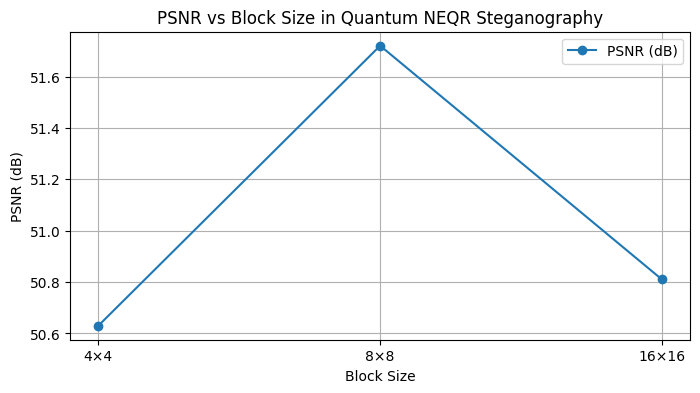

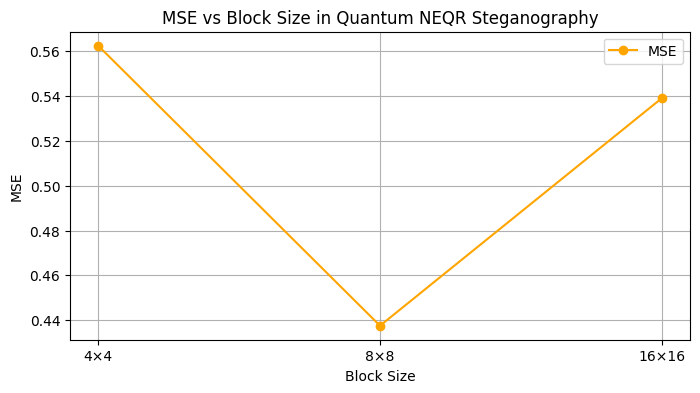

In [ ]:
# ===============================================================
# Quantum-Inspired NEQR Steganography – Block Size vs PSNR Analysis
# (For Google Colab, using uploaded real images)
#  M.Tech Quantum Image Project
# ===============================================================

from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
import math, os
from math import log2
from PIL import Image
import pandas as pd

# ---------- Upload once ----------
print("📂 Please upload your COVER image")
cover_upload = files.upload()
cover_path = list(cover_upload.keys())[0]

print("📂 Please upload your SECRET image")
secret_upload = files.upload()
secret_path = list(secret_upload.keys())[0]


# ---------- NEQR + LSB Simulation Functions ----------
def create_neqr_statevector(pixel_block, q_bits):
    H = pixel_block.shape[0]
    assert H == pixel_block.shape[1], "Block must be square"
    n = int(round(log2(H)))
    p_bits = 2 * n
    total_qubits = q_bits + p_bits
    N = 2 ** total_qubits
    state = np.zeros(N, dtype=complex)
    amp = 1 / (2 ** n)
    for y in range(H):
        for x in range(H):
            pos_index = y * H + x
            color_val = int(pixel_block[y, x])
            basis_index = (color_val << p_bits) | pos_index
            state[basis_index] = amp
    return state, {'n': n, 'p_bits': p_bits, 'q_bits': q_bits, 'H': H}

def reconstruct_pixels_from_statevector(state, meta):
    H, p_bits, q_bits = meta['H'], meta['p_bits'], meta['q_bits']
    pixels = np.zeros((H, H), dtype=int)
    for pos_index in range(2**p_bits):
        for color in range(2**q_bits):
            idx = (color << p_bits) | pos_index
            if np.abs(state[idx]) > 1e-12:
                y, x = divmod(pos_index, H)
                pixels[y, x] = color
                break
    return pixels

def embed_secret_lsb_on_statevector(state, meta, secret_bits_flat):
    p_bits, q_bits, H = meta['p_bits'], meta['q_bits'], meta['H']
    positions = 2**p_bits
    state2 = state.copy()
    for pos_index in range(min(positions, len(secret_bits_flat))):
        sbit = int(secret_bits_flat[pos_index] & 1)
        max_amp, current_color = 0.0, 0
        for color in range(2**q_bits):
            idx = (color << p_bits) | pos_index
            amp = np.abs(state2[idx])
            if amp > max_amp:
                max_amp, current_color = amp, color
        current_lsb = current_color & 1
        if current_lsb != sbit:
            color_a = current_color
            color_b = current_color ^ 1
            idx_a = (color_a << p_bits) | pos_index
            idx_b = (color_b << p_bits) | pos_index
            state2[idx_a], state2[idx_b] = state2[idx_b], state2[idx_a]
    return state2

def psnr(img1, img2, max_pixel=255.0):
    mse = np.mean((img1.astype(float) - img2.astype(float))**2)
    if mse == 0: return float('inf'), 0.0
    return 10 * math.log10((max_pixel ** 2) / mse), mse


# ---------- Process for multiple block sizes ----------
cover_orig = Image.open(cover_path).convert("L")
secret_orig = Image.open(secret_path).convert("1")

block_sizes = [4, 8, 16]
q_bits = 8
results = []

for target_size in block_sizes:
    print(f"\n🧱 Running Quantum Steganography for Block Size: {target_size}×{target_size}")

    cover = cover_orig.resize((target_size, target_size))
    secret = secret_orig.resize((target_size, target_size))

    cover_np = np.array(cover)
    secret_np = (np.array(secret) > 0).astype(int)

    # Encode + Embed + Reconstruct
    state, meta = create_neqr_statevector(cover_np, q_bits)
    secret_bits = secret_np.flatten()
    stego_state = embed_secret_lsb_on_statevector(state, meta, secret_bits)
    stego_pixels = reconstruct_pixels_from_statevector(stego_state, meta)

    # Extract secret
    extracted_bits = (stego_pixels & 1).flatten()[:len(secret_bits)]
    extracted_secret = np.reshape(extracted_bits, secret_np.shape)

    # Compute Metrics
    psnr_val, mse_val = psnr(cover_np, stego_pixels)
    capacity = len(secret_bits) / (cover_np.size)

    results.append({
        "Block Size": f"{target_size}×{target_size}",
        "PSNR (dB)": round(psnr_val, 2),
        "MSE": round(mse_val, 4),
        "Capacity (bpp)": round(capacity, 2)
    })

# ---------- Show Results ----------
df = pd.DataFrame(results)
print("\n📊 Quantum Image Steganography Results by Block Size")
print(df)

# Plot graphs
plt.figure(figsize=(8,4))
plt.plot(df["Block Size"], df["PSNR (dB)"], marker='o', label="PSNR (dB)")
plt.title("PSNR vs Block Size in Quantum NEQR Steganography")
plt.xlabel("Block Size")
plt.ylabel("PSNR (dB)")
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(8,4))
plt.plot(df["Block Size"], df["MSE"], marker='o', color='orange', label="MSE")
plt.title("MSE vs Block Size in Quantum NEQR Steganography")
plt.xlabel("Block Size")
plt.ylabel("MSE")
plt.grid(True)
plt.legend()
plt.show()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 53.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 42.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 1.6 MB/s eta 0:00:00
=== NEQR Qiskit Demo (block 4x4, q_bits=4) ===
Cover (scaled):
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]

Secret bits:
 [[0 1 0 1]
 [1 0 1 0]
 [0 1 0 1]
 [1 0 1 0]]

-- Using Initialize --
Stego pixels:
 [[0 1 0 0]
 [4 5 0 0]
 [0 0 2 3]
 [0 0 6 7]]
Extracted secret:
 [[0 1 0 0]
 [0 1 0 0]
 [0 0 0 1]
 [0 0 0 1]]
PSNR (dB): 6.467, MSE: 50.75000

-- Using Gatewise MCX --
Stego pixels:
 [[0 1 0 0]
 [4 5 0 0]
 [0 0 2 3]
 [0 0 6 7]]
Extracted secret:
 [[0 1 0 0]
 [0 1 0 0]
 [0 0 0 1]
 [0 0 0 1]]
PSNR (dB): 6.467, MSE: 50.75000


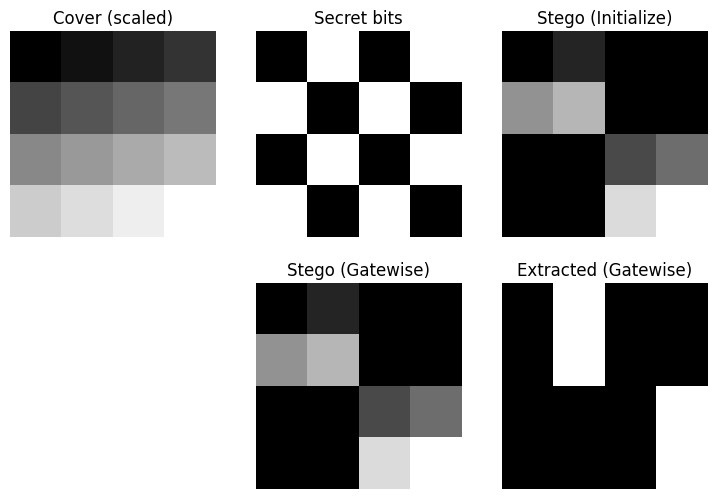


Circuit (Initialize) summary:


»
q_0: »
     »
q_1: »
     »
q_2: »
     »
q_3: »
     »
q_4: »
     »
q_5: »
     »
q_6: »
     »
q_7: »
     »
«     ┌──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐»
«q_0: ┤0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             ├»
«     │                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              │»
«q_1: ┤1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             ├»
«     │                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              │»
«q_2: ┤2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             ├»
«     │                                                                                                                                                                                                                                                                                                                                                                                       


Circuit (Gatewise) summary:


»
q_0: ──────────────────────────────────────────────────────────────────────»
                                                                           »
q_1: ──────────────────────────────────────────────────────────────────────»
                                        ┌───┐          ┌───┐               »
q_2: ───────────────────────────────────┤ X ├──────────┤ X ├───────────────»
                         ┌───┐          └─┬─┘          └─┬─┘┌───┐          »
q_3: ────────────────────┤ X ├────────────┼──────────────┼──┤ X ├──────────»
     ┌───┐┌───┐┌───┐┌───┐└─┬─┘┌───┐┌───┐  │  ┌───┐┌───┐  │  └─┬─┘┌───┐┌───┐»
q_4: ┤ H ├┤ X ├┤ X ├┤ X ├──■──┤ X ├┤ X ├──■──┤ X ├┤ X ├──■────■──┤ X ├┤ X ├»
     ├───┤├───┤├───┤├───┤  │  ├───┤├───┤  │  ├───┤├───┤  │    │  ├───┤└───┘»
q_5: ┤ H ├┤ X ├┤ X ├┤ X ├──■──┤ X ├┤ X ├──■──┤ X ├┤ X ├──■────■──┤ X ├─────»
     ├───┤├───┤├───┤├───┤  │  ├───┤└───┘  │  └───┘└───┘  │    │  ├───┤     »
q_6: ┤ H ├┤ X ├┤ X ├┤ X ├──■──┤ X ├───────■──────────────■────■──┤ X ├─────»
     ├───┤├───┤├───┤└───┘  │  ├───┤       │  ┌───┐       │    │  ├───┤     »
q_7: ┤ H ├┤ X ├┤ X ├───────■──┤ X ├───────■──┤ X ├───────■────■──┤ X ├─────»
     └───┘└───┘└───┘          └───┘          └───┘               └───┘     »
q_8: ──────────────────────────────────────────────────────────────────────»
                                                                           »
q_9: ──────────────────────────────────────────────────────────────────────»
                                                                           »
«                                                                           »
«q_0: ──────────────────────────────────────────────────────────────────────»
«     ┌───┐          ┌───┐               ┌───┐               ┌───┐          »
«q_1: ┤ X ├──────────┤ X ├───────────────┤ X ├───────────────┤ X ├──────────»
«     └─┬─┘          └─┬─┘               └─┬─┘┌───┐          └─┬─┘┌───┐     »
«q_2: ──┼──────────────┼───────────────────┼──┤ X ├────────────┼──┤ X ├─────»
«       │              │  ┌───┐            │  └─┬─┘            │  └─┬─┘┌───┐»
«q_3: ──┼──────────────┼──┤ X ├────────────┼────┼──────────────┼────┼──┤ X ├»
«       │  ┌───┐┌───┐  │  └─┬─┘┌───┐┌───┐  │    │  ┌───┐┌───┐  │    │  └─┬─┘»
«q_4: ──■──┤ X ├┤ X ├──■────■──┤ X ├┤ X ├──■────■──┤ X ├┤ X ├──■────■────■──»
«       │  └───┘└───┘  │    │  └───┘└───┘  │    │  └───┘└───┘  │    │    │  »
«q_5: ──■──────────────■────■──────────────■────■──────────────■────■────■──»
«       │  ┌───┐┌───┐  │    │  ┌───┐       │    │              │    │    │  »
«q_6: ──■──┤ X ├┤ X ├──■────■──┤ X ├───────■────■──────────────■────■────■──»
«       │  ├───┤└───┘  │    │  ├───┤       │    │  ┌───┐       │    │    │  »
«q_7: ──■──┤ X ├───────■────■──┤ X ├───────■────■──┤ X ├───────■────■────■──»
«          └───┘               └───┘               └───┘                    »
«q_8: ──────────────────────────────────────────────────────────────────────»
«                                                                           »
«q_9: ──────────────────────────────────────────────────────────────────────»
«                                                                           »
«          ┌───┐          ┌───┐               ┌───┐               ┌───┐     »
«q_0: ─────┤ X ├──────────┤ X ├───────────────┤ X ├───────────────┤ X ├─────»
«          └─┬─┘          └─┬─┘               └─┬─┘               └─┬─┘     »
«q_1: ───────┼──────────────┼───────────────────┼───────────────────┼───────»
«            │              │                   │  ┌───┐            │  ┌───┐»
«q_2: ───────┼──────────────┼───────────────────┼──┤ X ├────────────┼──┤ X ├»
«            │              │  ┌───┐            │  └─┬─┘            │  └─┬─┘»
«q_3: ───────┼──────────────┼──┤ X ├────────────┼────┼──────────────┼────┼──»
«     ┌───┐  │              │  └─┬─┘            │    │              │    │  »
«q_4: ┤ X ├──■──────────────■────■──────────────■────■──────────────■────■──»
«     ├───┤  │  ┌───┐┌───┐  │    │  ┌───

In [ ]:
# ===============================================================
# Qiskit-based NEQR Steganography Demo (Colab Version)
# ===============================================================

!pip install qiskit --quiet
!pip install pylatexenc --quiet

import numpy as np
from math import log2
from PIL import Image
import matplotlib.pyplot as plt
import math

# Qiskit imports
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import transpile
from qiskit.quantum_info import Statevector
from qiskit.circuit.library import Initialize

# ---------------------------
# Utility: build small test block (or replace with image block)
# ---------------------------
def make_test_block(H=4):
    # small 4x4 gradient for demonstration (0..255)
    blk = np.zeros((H, H), dtype=int)
    for y in range(H):
        for x in range(H):
            blk[y,x] = int((y * H + x) * (255 / (H*H - 1)))
    return blk

# ---------------------------
# Function: create NEQR statevector (numpy) as in earlier simulation
# ---------------------------
def neqr_statevector_from_block(pixel_block, q_bits=8):
    H = pixel_block.shape[0]
    assert H == pixel_block.shape[1]
    n = int(round(log2(H)))
    p_bits = 2*n
    total_qubits = q_bits + p_bits
    N = 2**total_qubits
    state = np.zeros(N, dtype=complex)
    amp = 1 / (2**n)
    for y in range(H):
        for x in range(H):
            pos_index = y*H + x
            color_val = int(pixel_block[y,x])
            basis_index = (color_val << p_bits) | pos_index
            state[basis_index] = amp
    # normalization check
    norm = np.sum(np.abs(state)**2)
    if not np.isclose(norm,1.0):
        raise RuntimeError(f"NEQR state not normalized, norm={norm}")
    meta = {'H': H, 'n': n, 'p_bits': p_bits, 'q_bits': q_bits, 'total_qubits': total_qubits}
    return state, meta

# ---------------------------
# Method A: Build circuit using Initialize (loads full statevector)
# ---------------------------
def build_circuit_initialize(pixel_block, q_bits=8):
    statevec, meta = neqr_statevector_from_block(pixel_block, q_bits=q_bits)
    total_qubits = meta['total_qubits']
    # Create registers: we'll map ordering as [color_bits (MSB..LSB), position_bits (MSB..LSB)]
    qr = QuantumRegister(total_qubits, name='q')
    qc = QuantumCircuit(qr, name='NEQR_init')

    # Initialize expects amplitudes in the computational basis ordering used by qiskit
    init = Initialize(statevec)
    qc.append(init, qr[:])   # load full NEQR state
    qc.barrier()
    return qc, meta

# ---------------------------
# Method B: Gate-based NEQR (construct color bits with multi-controlled X)
# ---------------------------
def build_circuit_gatewise(pixel_block, q_bits=8):
    H = pixel_block.shape[0]
    n = int(round(log2(H)))
    p_bits = 2*n
    total_qubits = q_bits + p_bits

    # allocate: color qubits first (indices 0..q_bits-1), then position qubits (indices q_bits..q_bits+p_bits-1)
    color_q = list(range(0, q_bits))
    pos_q = list(range(q_bits, q_bits + p_bits))

    # Number of ancillas needed for mcx v-chain: max(0, num_controls - 2)
    num_controls = len(pos_q)
    ancillas_needed = max(0, num_controls - 2)

    # Build registers
    qreg = QuantumRegister(total_qubits + ancillas_needed, name='q')
    qc = QuantumCircuit(qreg, name='NEQR_gatewise')

    # Apply Hadamards on position qubits to create uniform superposition of positions
    for idx in pos_q:
        qc.h(qreg[idx])

    # For each pixel (position), for each color bit that is 1, apply MCX with controls = pos_q and target = color_bit
    # This sets color bits conditioned on position superposition.
    # We'll use ancillas (v-chain) for mcx if needed.
    anc_idx = [total_qubits + i for i in range(ancillas_needed)]

    for y in range(H):
        for x in range(H):
            pos_index = y * H + x
            color_val = int(pixel_block[y, x])
            # binary bits MSB..LSB -> map to color qubits indices (we chose MSB at color_q[0])
            bin_str = format(color_val, f'0{q_bits}b')
            # Controls need to match the basis state for position pos_index.
            # To target a particular position basis vector, we need to control on each position qubit being 0 or 1.
            # This requires using X gates to flip controls where the desired control bit is 0.
            pos_bits = format(pos_index, f'0{p_bits}b')  # MSB..LSB
            # Pre-transform: for each control qubit where pos_bit == '0', apply X to turn it into '1' control
            for i, b in enumerate(pos_bits):
                if b == '0':
                    qc.x(qreg[pos_q[i]])
            # Now apply MCX for each color bit=1
            controls = [qreg[i] for i in pos_q]
            for bit_i, b in enumerate(bin_str):
                if b == '1':
                    target = qreg[color_q[bit_i]]
                    if ancillas_needed > 0:
                        qc.mcx(controls, target, [qreg[a] for a in anc_idx])
                    else:
                        qc.mcx(controls, target)
            # Undo pre-transform
            for i, b in enumerate(pos_bits):
                if b == '0':
                    qc.x(qreg[pos_q[i]])

    qc.barrier()
    meta = {'H': H, 'n': n, 'p_bits': p_bits, 'q_bits': q_bits, 'total_qubits': total_qubits, 'color_q':color_q, 'pos_q':pos_q, 'ancilla_q':anc_idx}
    return qc, meta

# ---------------------------
# Embedding: flip LSB (color bit 0 is MSB in our mapping; choose last bit as LSB)
# We'll assume color qubits are ordered MSB..LSB and LSB is color_q[-1]
# ---------------------------
def embed_secret_by_mcx(qc, meta, secret_bits, use_register_indices=True):
    """
    qc : QuantumCircuit (should already contain NEQR preparation)
    meta: metadata from build function
    secret_bits: list/array of length H*H with bits 0/1
    This appends MCX operations that flip the color LSB when position matches and secret bit=1.
    """
    H = meta['H']
    p_bits = meta['p_bits']
    q_bits = meta['q_bits']
    # determine register mapping if QuantumCircuit uses a flat register q[0..]
    # we will infer indices from meta if provided (meta from gatewise includes color_q and pos_q)
    if 'color_q' in meta and 'pos_q' in meta:
        color_q_idx = meta['color_q']
        pos_q_idx = meta['pos_q']
        anc_idx = meta.get('ancilla_q', [])
    else:
        # fallback: assume ordering [color (0..q_bits-1), pos (q_bits..q_bits+p_bits-1)]
        color_q_idx = list(range(0,q_bits))
        pos_q_idx = list(range(q_bits, q_bits+p_bits))
        anc_idx = []

    lsb_target = color_q_idx[-1]  # pick last color qubit as LSB

    # For each position, add controlled X (mcx) on target if secret bit is 1
    for pos_index in range(H*H):
        if pos_index >= len(secret_bits):
            break
        sbit = int(secret_bits[pos_index] & 1)
        if sbit == 0:
            continue
        # Need to create controls that match the basis state pos_index.
        pos_bits = format(pos_index, f'0{p_bits}b')  # MSB..LSB
        # Pre X for zero bits on position qubits
        for i, b in enumerate(pos_bits):
            if b == '0':
                qc.x(qc.qubits[pos_q_idx[i]])
        # Apply MCX
        controls = [qc.qubits[i] for i in pos_q_idx]
        if len(anc_idx) > 0:
            qc.mcx(controls, qc.qubits[lsb_target], [qc.qubits[a] for a in anc_idx])
        else:
            qc.mcx(controls, qc.qubits[lsb_target])
        # Undo pre Xs
        for i, b in enumerate(pos_bits):
            if b == '0':
                qc.x(qc.qubits[pos_q_idx[i]])

    qc.barrier()
    return qc

# ---------------------------
# Readout: reconstruct pixels from final statevector (same parsing as earlier)
# ---------------------------
def reconstruct_from_statevector(statevec, meta):
    # statevec: numpy array amplitudes
    H = meta['H']
    p_bits = meta['p_bits']
    q_bits = meta['q_bits']
    pixels = np.zeros((H,H), dtype=int)
    for pos_index in range(2**p_bits):
        for color in range(2**q_bits):
            idx = (color << p_bits) | pos_index
            if np.abs(statevec[idx]) > 1e-12:
                y, x = divmod(pos_index, H)
                pixels[y,x] = color
                break
    return pixels

# ---------------------------
# Demo: Putting it all together for a small 4x4 block
# ---------------------------
def demo_neqr_qiskit(block_size=4, q_bits=4, secret_mode='checker'):
    # q_bits small for clarity in circuit diagrams; q_bits=4 means color values 0..15
    H = block_size
    cover = make_test_block(H)
    if q_bits < 8:
        # scale down to q_bits range
        cover = (cover * (2**q_bits - 1) / 255).astype(int)

    # secret: small pattern or random
    if secret_mode == 'checker':
        secret_small = np.array([[ (i+j)&1 for j in range(H)] for i in range(H)], dtype=int)
    else:
        secret_small = np.random.randint(0,2,size=(H,H))

    secret_bits = secret_small.flatten()

    # Method A: Initialize
    statevec, meta = neqr_statevector_from_block(cover, q_bits=q_bits)
    qc_init = QuantumCircuit(meta['total_qubits'], name='NEQR_init')
    init_gate = Initialize(statevec)
    qc_init.append(init_gate, qc_init.qubits)
    qc_init.barrier()
    # embed via mcx: need to know mapping: in Initialize we used ordering color_bits first then position bits
    # create metadata mapping for embed function
    meta_init = {'H':meta['H'], 'p_bits':meta['p_bits'], 'q_bits':meta['q_bits'], 'total_qubits':meta['total_qubits'],
                 'color_q': list(range(0,q_bits)), 'pos_q': list(range(q_bits, q_bits+meta['p_bits'])), 'ancilla_q': []}
    # Use some ancillas if controls>2, allocate them explicitly (for simplicity we skip ancillas here for Initialize demo)
    qc_init = embed_secret_by_mcx(qc_init, meta_init, secret_bits)
    # get final statevector
    sv_init = Statevector.from_instruction(qc_init).data
    stego_pixels_init = reconstruct_from_statevector(sv_init, meta)
    # extract secret
    extracted_init = (stego_pixels_init & 1)

    # Method B: Gatewise
    qc_gate, meta_gate = build_circuit_gatewise(cover, q_bits=q_bits)
    # The gatewise builder already prepared NEQR; now embed secret
    qc_gate = embed_secret_by_mcx(qc_gate, meta_gate, secret_bits)
    sv_gate = Statevector.from_instruction(qc_gate).data
    stego_pixels_gate = reconstruct_from_statevector(sv_gate, meta_gate)
    extracted_gate = (stego_pixels_gate & 1)

    # Compute metrics (compare cover->stego in scaled range)
    max_pixel = (2**q_bits - 1)
    def psnr(a,b):
        mse = np.mean((a.astype(float)-b.astype(float))**2)
        if mse == 0: return float('inf'), 0.0
        return 10*math.log10((max_pixel**2)/mse), mse

    psnr_init, mse_init = psnr(cover, stego_pixels_init)
    psnr_gate, mse_gate = psnr(cover, stego_pixels_gate)

    # Print results
    print("=== NEQR Qiskit Demo (block {}x{}, q_bits={}) ===".format(H,H,q_bits))
    print("Cover (scaled):\n", cover)
    print("\nSecret bits:\n", secret_small)
    print("\n-- Using Initialize --")
    print("Stego pixels:\n", stego_pixels_init)
    print("Extracted secret:\n", extracted_init)
    print("PSNR (dB): {:.3f}, MSE: {:.5f}".format(psnr_init, mse_init))
    print("\n-- Using Gatewise MCX --")
    print("Stego pixels:\n", stego_pixels_gate)
    print("Extracted secret:\n", extracted_gate)
    print("PSNR (dB): {:.3f}, MSE: {:.5f}".format(psnr_gate, mse_gate))

    # Visualize small arrays
    fig, axs = plt.subplots(2,3, figsize=(9,6))
    axs[0,0].imshow(cover, cmap='gray'); axs[0,0].set_title('Cover (scaled)'); axs[0,0].axis('off')
    axs[0,1].imshow(secret_small, cmap='gray'); axs[0,1].set_title('Secret bits'); axs[0,1].axis('off')
    axs[0,2].imshow(stego_pixels_init, cmap='gray'); axs[0,2].set_title('Stego (Initialize)'); axs[0,2].axis('off')
    axs[1,0].axis('off')
    axs[1,1].imshow(stego_pixels_gate, cmap='gray'); axs[1,1].set_title('Stego (Gatewise)'); axs[1,1].axis('off')
    axs[1,2].imshow(extracted_gate, cmap='gray'); axs[1,2].set_title('Extracted (Gatewise)'); axs[1,2].axis('off')
    plt.show()

    # Return circuits and metadata if user wants to inspect / draw
    return {
        'qc_init': qc_init, 'qc_gate': qc_gate,
        'meta_init': meta_init, 'meta_gate': meta_gate,
        'stego_init': stego_pixels_init, 'stego_gate': stego_pixels_gate,
        'extracted_init': extracted_init, 'extracted_gate': extracted_gate
    }

# Run demo
res = demo_neqr_qiskit(block_size=4, q_bits=4, secret_mode='checker')

# If you want to view the circuits, you can draw them:
print("\nCircuit (Initialize) summary:")
display(res['qc_init'].draw('text'))
print("\nCircuit (Gatewise) summary:")
display(res['qc_gate'].draw('text'))

📂 Please upload your COVER image


Saving bird-color.jpg to bird-color.jpg
📂 Please upload your SECRET image


Saving nature.jpg to nature.jpg
✅ Images resized to (512, 512)
Processing block 1/4096
Processing block 101/4096
Processing block 201/4096
Processing block 301/4096
Processing block 401/4096
Processing block 501/4096
Processing block 601/4096
Processing block 701/4096
Processing block 801/4096
Processing block 901/4096
Processing block 1001/4096
Processing block 1101/4096
Processing block 1201/4096
Processing block 1301/4096
Processing block 1401/4096
Processing block 1501/4096
Processing block 1601/4096
Processing block 1701/4096
Processing block 1801/4096
Processing block 1901/4096
Processing block 2001/4096
Processing block 2101/4096
Processing block 2201/4096
Processing block 2301/4096
Processing block 2401/4096
Processing block 2501/4096
Processing block 2601/4096
Processing block 2701/4096
Processing block 2801/4096
Processing block 2901/4096
Processing block 3001/4096
Processing block 3101/4096
Processing block 3201/4096
Processing block 3301/4096
Processing block 3401/4096
Proc

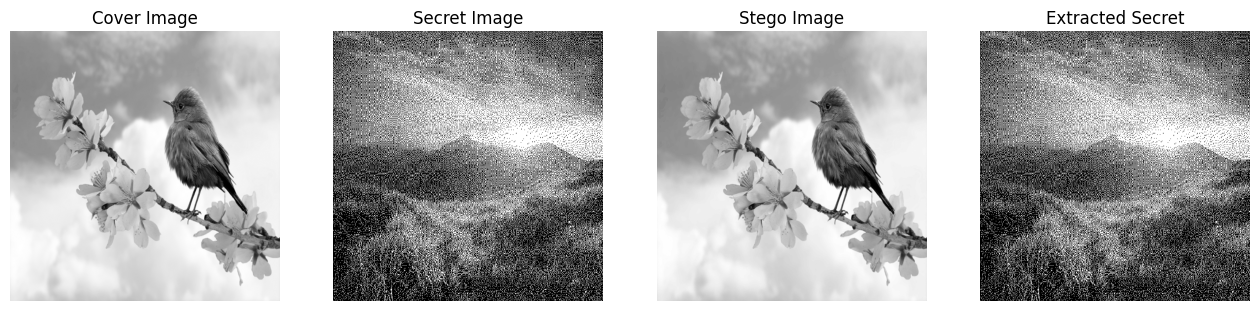

✅ Saved stego and extracted secret images to 'quantum_large_output/'


In [ ]:
# ===============================================================
# Quantum-Inspired NEQR Steganography for Large Real Images
# (Hybrid Block-Based Implementation for Colab)
# | M.Tech Quantum Image Project (NEQR)
# ===============================================================

from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
import math, os
from PIL import Image
from math import log2

# ---------- Upload images ----------
print("📂 Please upload your COVER image")
cover_upload = files.upload()
cover_path = list(cover_upload.keys())[0]

print("📂 Please upload your SECRET image")
secret_upload = files.upload()
secret_path = list(secret_upload.keys())[0]


# ---------- Quantum-Inspired Functions (NEQR logic simulated) ----------
def create_neqr_statevector(pixel_block, q_bits):
    H = pixel_block.shape[0]
    n = int(round(log2(H)))
    p_bits = 2 * n
    total_qubits = q_bits + p_bits
    N = 2 ** total_qubits
    state = np.zeros(N, dtype=complex)
    amp = 1 / (2 ** n)
    for y in range(H):
        for x in range(H):
            pos_index = y * H + x
            color_val = int(pixel_block[y, x])
            basis_index = (color_val << p_bits) | pos_index
            state[basis_index] = amp
    return state, {'H': H, 'p_bits': p_bits, 'q_bits': q_bits}

def reconstruct_pixels_from_statevector(state, meta):
    H, p_bits, q_bits = meta['H'], meta['p_bits'], meta['q_bits']
    pixels = np.zeros((H, H), dtype=int)
    for pos_index in range(2**p_bits):
        for color in range(2**q_bits):
            idx = (color << p_bits) | pos_index
            if np.abs(state[idx]) > 1e-12:
                y, x = divmod(pos_index, H)
                pixels[y, x] = color
                break
    return pixels

def embed_secret_lsb_on_statevector(state, meta, secret_bits_flat):
    p_bits, q_bits, H = meta['p_bits'], meta['q_bits'], meta['H']
    positions = 2**p_bits
    state2 = state.copy()
    for pos_index in range(min(positions, len(secret_bits_flat))):
        sbit = int(secret_bits_flat[pos_index] & 1)
        max_amp, current_color = 0.0, 0
        for color in range(2**q_bits):
            idx = (color << p_bits) | pos_index
            amp = np.abs(state2[idx])
            if amp > max_amp:
                max_amp, current_color = amp, color
        current_lsb = current_color & 1
        if current_lsb != sbit:
            color_a = current_color
            color_b = current_color ^ 1
            idx_a = (color_a << p_bits) | pos_index
            idx_b = (color_b << p_bits) | pos_index
            state2[idx_a], state2[idx_b] = state2[idx_b], state2[idx_a]
    return state2


# ---------- Image Utility Functions ----------
def blockify(img, block_size=8):
    h, w = img.shape
    blocks = []
    for y in range(0, h, block_size):
        for x in range(0, w, block_size):
            block = img[y:y+block_size, x:x+block_size]
            if block.shape == (block_size, block_size):
                blocks.append(((y, x), block))
    return blocks

def unblockify(blocks, shape, block_size=8):
    h, w = shape
    img = np.zeros((h, w), dtype=int)
    for (y, x), block in blocks:
        img[y:y+block_size, x:x+block_size] = block
    return img

def psnr(img1, img2, max_pixel=255.0):
    mse = np.mean((img1.astype(float) - img2.astype(float))**2)
    if mse == 0: return float('inf'), 0
    return 10 * math.log10((max_pixel ** 2) / mse), mse


# ---------- Main Process ----------
def quantum_stego_large_image(cover_path, secret_path, block_size=8, q_bits=8):
    cover = Image.open(cover_path).convert("L")
    secret = Image.open(secret_path).convert("1")

    cover = cover.resize((512, 512))
    secret = secret.resize((512, 512))

    cover_np = np.array(cover)
    secret_np = (np.array(secret) > 0).astype(int)

    print(f"✅ Images resized to {cover_np.shape}")

    cover_blocks = blockify(cover_np, block_size)
    secret_blocks = blockify(secret_np, block_size)

    stego_blocks = []
    total_blocks = len(cover_blocks)

    for idx, ((y, x), cover_block) in enumerate(cover_blocks):
        secret_block = secret_blocks[idx][1]
        secret_bits = secret_block.flatten()

        # Encode, embed, reconstruct
        state, meta = create_neqr_statevector(cover_block, q_bits)
        stego_state = embed_secret_lsb_on_statevector(state, meta, secret_bits)
        stego_block = reconstruct_pixels_from_statevector(stego_state, meta)
        stego_blocks.append(((y, x), stego_block))

        if idx % 100 == 0:
            print(f"Processing block {idx+1}/{total_blocks}")

    stego_np = unblockify(stego_blocks, cover_np.shape, block_size)
    extracted_secret = (stego_np & 1)

    psnr_val, mse_val = psnr(cover_np, stego_np)
    capacity = 1.0  # 1 bit per pixel

    print("\n📊 Large Image Quantum-Inspired Steganography Results")
    print("------------------------------------------------------")
    print(f"Block Size: {block_size}×{block_size}")
    print(f"PSNR (dB): {psnr_val:.2f}")
    print(f"MSE: {mse_val:.4f}")
    print(f"Capacity: {capacity:.2f} bits/pixel")
    print("------------------------------------------------------")

    # Display
    fig, ax = plt.subplots(1, 4, figsize=(16, 4))
    ax[0].imshow(cover_np, cmap='gray'); ax[0].set_title("Cover Image")
    ax[1].imshow(secret_np, cmap='gray'); ax[1].set_title("Secret Image")
    ax[2].imshow(stego_np, cmap='gray'); ax[2].set_title("Stego Image")
    ax[3].imshow(extracted_secret, cmap='gray'); ax[3].set_title("Extracted Secret")
    for a in ax: a.axis('off')
    plt.show()

    # Save output
    os.makedirs("quantum_large_output", exist_ok=True)
    Image.fromarray(stego_np.astype(np.uint8)).save("quantum_large_output/stego.png")
    Image.fromarray((extracted_secret*255).astype(np.uint8)).save("quantum_large_output/extracted_secret.png")
    print("✅ Saved stego and extracted secret images to 'quantum_large_output/'")

    return psnr_val, mse_val


# ---------- Run ----------
psnr_val, mse_val = quantum_stego_large_image(cover_path, secret_path, block_size=8, q_bits=8)


📂 Please upload your COVER image


Saving bird-color.jpg to bird-color (1).jpg
📂 Please upload your SECRET image


Saving nature.jpg to nature (1).jpg
✅ Images resized to (512, 512)
Processing block 1/4096
Processing block 101/4096
Processing block 201/4096
Processing block 301/4096
Processing block 401/4096
Processing block 501/4096
Processing block 601/4096
Processing block 701/4096
Processing block 801/4096
Processing block 901/4096
Processing block 1001/4096
Processing block 1101/4096
Processing block 1201/4096
Processing block 1301/4096
Processing block 1401/4096
Processing block 1501/4096
Processing block 1601/4096
Processing block 1701/4096
Processing block 1801/4096
Processing block 1901/4096
Processing block 2001/4096
Processing block 2101/4096
Processing block 2201/4096
Processing block 2301/4096
Processing block 2401/4096
Processing block 2501/4096
Processing block 2601/4096
Processing block 2701/4096
Processing block 2801/4096
Processing block 2901/4096
Processing block 3001/4096
Processing block 3101/4096
Processing block 3201/4096
Processing block 3301/4096
Processing block 3401/4096


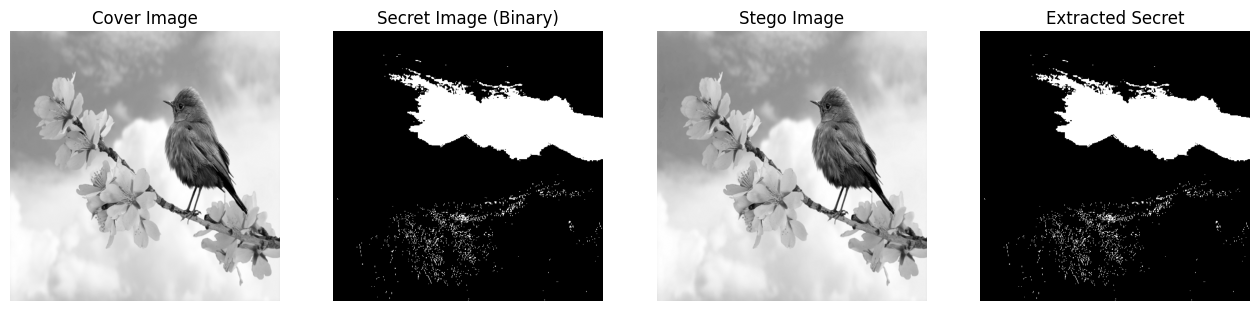

✅ Saved stego and extracted secret images to 'quantum_large_output/'


In [ ]:
# ===============================================================
# Quantum-Inspired NEQR Steganography for Large Real Images
# (Fixed version with clean binary secret image & extraction)
# ===============================================================

from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
import math, os
from PIL import Image
from math import log2

# ---------- Upload images ----------
print("📂 Please upload your COVER image")
cover_upload = files.upload()
cover_path = list(cover_upload.keys())[0]

print("📂 Please upload your SECRET image")
secret_upload = files.upload()
secret_path = list(secret_upload.keys())[0]


# ---------- Quantum-Inspired Functions (NEQR logic simulated) ----------
def create_neqr_statevector(pixel_block, q_bits):
    H = pixel_block.shape[0]
    n = int(round(log2(H)))
    p_bits = 2 * n
    total_qubits = q_bits + p_bits
    N = 2 ** total_qubits
    state = np.zeros(N, dtype=complex)
    amp = 1 / (2 ** n)
    for y in range(H):
        for x in range(H):
            pos_index = y * H + x
            color_val = int(pixel_block[y, x])
            basis_index = (color_val << p_bits) | pos_index
            state[basis_index] = amp
    return state, {'H': H, 'p_bits': p_bits, 'q_bits': q_bits}

def reconstruct_pixels_from_statevector(state, meta):
    H, p_bits, q_bits = meta['H'], meta['p_bits'], meta['q_bits']
    pixels = np.zeros((H, H), dtype=int)
    for pos_index in range(2**p_bits):
        for color in range(2**q_bits):
            idx = (color << p_bits) | pos_index
            if np.abs(state[idx]) > 1e-12:
                y, x = divmod(pos_index, H)
                pixels[y, x] = color
                break
    return pixels

def embed_secret_lsb_on_statevector(state, meta, secret_bits_flat):
    p_bits, q_bits, H = meta['p_bits'], meta['q_bits'], meta['H']
    positions = 2**p_bits
    state2 = state.copy()
    for pos_index in range(min(positions, len(secret_bits_flat))):
        sbit = int(secret_bits_flat[pos_index] & 1)
        max_amp, current_color = 0.0, 0
        for color in range(2**q_bits):
            idx = (color << p_bits) | pos_index
            amp = np.abs(state2[idx])
            if amp > max_amp:
                max_amp, current_color = amp, color
        current_lsb = current_color & 1
        if current_lsb != sbit:
            color_a = current_color
            color_b = current_color ^ 1
            idx_a = (color_a << p_bits) | pos_index
            idx_b = (color_b << p_bits) | pos_index
            state2[idx_a], state2[idx_b] = state2[idx_b], state2[idx_a]
    return state2


# ---------- Image Utility Functions ----------
def blockify(img, block_size=8):
    h, w = img.shape
    blocks = []
    for y in range(0, h, block_size):
        for x in range(0, w, block_size):
            block = img[y:y+block_size, x:x+block_size]
            if block.shape == (block_size, block_size):
                blocks.append(((y, x), block))
    return blocks

def unblockify(blocks, shape, block_size=8):
    h, w = shape
    img = np.zeros((h, w), dtype=int)
    for (y, x), block in blocks:
        img[y:y+block_size, x:x+block_size] = block
    return img

def psnr(img1, img2, max_pixel=255.0):
    mse = np.mean((img1.astype(float) - img2.astype(float))**2)
    if mse == 0: return float('inf'), 0
    return 10 * math.log10((max_pixel ** 2) / mse), mse


# ---------- Main Process ----------
def quantum_stego_large_image(cover_path, secret_path, block_size=8, q_bits=8):
    cover = Image.open(cover_path).convert("L")

    # 🔹 Improved Secret Preprocessing
    secret = Image.open(secret_path).convert("L")
    # Apply a clean threshold to make it binary (0 or 255)
    secret = secret.point(lambda p: 255 if p > 180 else 0).convert("1")

    cover = cover.resize((512, 512))
    secret = secret.resize((512, 512))

    cover_np = np.array(cover)
    secret_np = (np.array(secret) > 0).astype(int)

    print(f"✅ Images resized to {cover_np.shape}")

    cover_blocks = blockify(cover_np, block_size)
    secret_blocks = blockify(secret_np, block_size)

    stego_blocks = []
    total_blocks = len(cover_blocks)

    for idx, ((y, x), cover_block) in enumerate(cover_blocks):
        secret_block = secret_blocks[idx][1]
        secret_bits = secret_block.flatten()

        # Encode, embed, reconstruct
        state, meta = create_neqr_statevector(cover_block, q_bits)
        stego_state = embed_secret_lsb_on_statevector(state, meta, secret_bits)
        stego_block = reconstruct_pixels_from_statevector(stego_state, meta)
        stego_blocks.append(((y, x), stego_block))

        if idx % 100 == 0:
            print(f"Processing block {idx+1}/{total_blocks}")

    stego_np = unblockify(stego_blocks, cover_np.shape, block_size)

    # 🔹 Clear extracted secret (amplified to 0–255 for better visibility)
    extracted_secret = (stego_np & 1) * 255

    psnr_val, mse_val = psnr(cover_np, stego_np)
    capacity = 1.0  # 1 bit per pixel

    print("\n📊 Large Image Quantum-Inspired Steganography Results")
    print("------------------------------------------------------")
    print(f"Block Size: {block_size}×{block_size}")
    print(f"PSNR (dB): {psnr_val:.2f}")
    print(f"MSE: {mse_val:.4f}")
    print(f"Capacity: {capacity:.2f} bits/pixel")
    print("------------------------------------------------------")

    # Display
    fig, ax = plt.subplots(1, 4, figsize=(16, 4))
    ax[0].imshow(cover_np, cmap='gray'); ax[0].set_title("Cover Image")
    ax[1].imshow(secret_np, cmap='gray'); ax[1].set_title("Secret Image (Binary)")
    ax[2].imshow(stego_np, cmap='gray'); ax[2].set_title("Stego Image")
    ax[3].imshow(extracted_secret, cmap='gray'); ax[3].set_title("Extracted Secret")
    for a in ax: a.axis('off')
    plt.show()

    # Save output
    os.makedirs("quantum_large_output", exist_ok=True)
    Image.fromarray(stego_np.astype(np.uint8)).save("quantum_large_output/stego.png")
    Image.fromarray(extracted_secret.astype(np.uint8)).save("quantum_large_output/extracted_secret.png")
    print("✅ Saved stego and extracted secret images to 'quantum_large_output/'")

    return psnr_val, mse_val


# ---------- Run ----------
psnr_val, mse_val = quantum_stego_large_image(cover_path, secret_path, block_size=8, q_bits=8)


📂 Please upload your COVER image (preferably 512x512 grayscale)


Saving nature.jpg to nature (2).jpg
📂 Please upload your SECRET image (preferably 256x256 grayscale)


Saving bird-color64.jpeg to bird-color64 (2).jpeg
✅ Cover size: (512, 512), Secret size: (256, 256)

📊 Steganography Results (2 bits per pixel)
---------------------------------------------
PSNR: 44.15 dB
MSE: 2.4999
Embedding capacity: 64.00 KB
---------------------------------------------


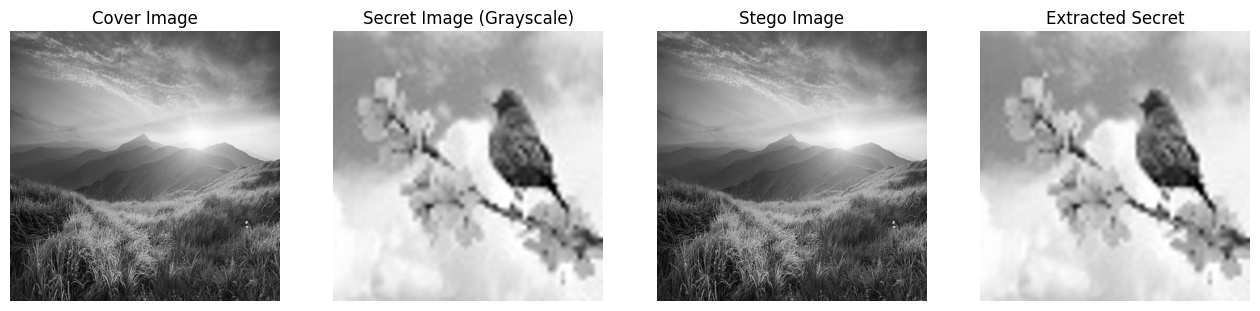

✅ Saved outputs to 'two_bit_output/' folder.


In [ ]:
# ===============================================================
# Quantum-Inspired 2-Bit Grayscale Steganography (Colab Version)
# ===============================================================
# Embeds a smaller grayscale secret into a larger grayscale cover
# using 2 LSBs per pixel. Computes PSNR and shows results.
# ===============================================================

from google.colab import files
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import math, os

# ---------- File upload ----------
print("📂 Please upload your COVER image (preferably 512x512 grayscale)")
cover_upload = files.upload()
cover_path = list(cover_upload.keys())[0]

print("📂 Please upload your SECRET image (preferably 256x256 grayscale)")
secret_upload = files.upload()
secret_path = list(secret_upload.keys())[0]


# ---------- Utility functions ----------
def psnr(img1, img2, max_pixel=255.0):
    mse = np.mean((img1.astype(float) - img2.astype(float)) ** 2)
    if mse == 0:
        return float("inf"), 0
    psnr_value = 10 * math.log10((max_pixel ** 2) / mse)
    return psnr_value, mse


def resize_images(cover, secret):
    """Resize cover to 512x512 and secret to 256x256."""
    cover = cover.resize((512, 512))
    secret = secret.resize((256, 256))
    return cover, secret


# ---------- Embedding and Extraction ----------
def embed_2bits(cover_np, secret_np):
    """
    Embed 2 most significant bits (MSB) of secret into
    2 least significant bits (LSB) of cover.
    """
    # Flatten both arrays
    h_cover, w_cover = cover_np.shape
    h_secret, w_secret = secret_np.shape

    # Convert secret to 2-bit chunks
    secret_flat = secret_np.flatten()
    secret_bits = np.unpackbits(secret_flat[:, np.newaxis], axis=1)  # shape (N, 8)
    secret_2msb = (secret_flat >> 6)  # take top 2 bits

    # Repeat each secret pixel's 2 bits into cover pixels
    # total cover pixels used = h_secret * w_secret
    # each cover pixel carries 2 bits
    cover_flat = cover_np.flatten()
    if len(secret_2msb) > len(cover_flat) // 4:
        raise ValueError("Secret image too large for 2-bit embedding in this cover.")

    # For 512x512 cover, 256x256 secret fits perfectly
    # We'll map each secret pixel to 4 cover pixels (since 8 bits / 2 = 4)
    cover_idx = 0
    stego_flat = cover_flat.copy()

    for secret_pixel in secret_flat:
        # Break each 8-bit secret pixel into 4 groups of 2 bits
        for i in range(4):
            two_bits = (secret_pixel >> (6 - 2 * i)) & 0b11  # take 2 bits
            # Clear last 2 bits of cover and replace with secret bits
            stego_flat[cover_idx] = (stego_flat[cover_idx] & 0b11111100) | two_bits
            cover_idx += 1
            if cover_idx >= len(stego_flat):
                break

    stego_np = stego_flat.reshape(h_cover, w_cover)
    return stego_np


def extract_2bits(stego_np, secret_shape):
    """
    Extract the 2 LSBs from every cover pixel and reconstruct the 8-bit secret.
    Each secret pixel was split into 4 cover pixels (2 bits each).
    """
    stego_flat = stego_np.flatten()
    extracted_bits = stego_flat & 0b11  # get 2 LSBs from each pixel

    # Group every 4 cover pixels into one secret pixel (8 bits)
    secret_pixels = []
    for i in range(0, len(extracted_bits), 4):
        group = extracted_bits[i : i + 4]
        if len(group) < 4:
            break
        secret_val = (
            (group[0] << 6)
            | (group[1] << 4)
            | (group[2] << 2)
            | (group[3])
        )
        secret_pixels.append(secret_val)

    secret_pixels = np.array(secret_pixels, dtype=np.uint8)
    secret_np = secret_pixels[: secret_shape[0] * secret_shape[1]].reshape(secret_shape)
    return secret_np


# ---------- Main Process ----------
def two_bit_steganography(cover_path, secret_path):
    cover = Image.open(cover_path).convert("L")
    secret = Image.open(secret_path).convert("L")
    cover, secret = resize_images(cover, secret)

    cover_np = np.array(cover)
    secret_np = np.array(secret)

    print(f"✅ Cover size: {cover_np.shape}, Secret size: {secret_np.shape}")

    # Embed
    stego_np = embed_2bits(cover_np, secret_np)

    # Extract
    extracted_secret = extract_2bits(stego_np, secret_np.shape)

    # Compute PSNR
    psnr_val, mse_val = psnr(cover_np, stego_np)
    capacity_bits = cover_np.size * 2
    capacity_bytes = capacity_bits / 8 / 1024

    print("\n📊 Steganography Results (2 bits per pixel)")
    print("---------------------------------------------")
    print(f"PSNR: {psnr_val:.2f} dB")
    print(f"MSE: {mse_val:.4f}")
    print(f"Embedding capacity: {capacity_bytes:.2f} KB")
    print("---------------------------------------------")

    # Display images
    fig, ax = plt.subplots(1, 4, figsize=(16, 4))
    ax[0].imshow(cover_np, cmap="gray")
    ax[0].set_title("Cover Image")
    ax[1].imshow(secret_np, cmap="gray")
    ax[1].set_title("Secret Image (Grayscale)")
    ax[2].imshow(stego_np, cmap="gray")
    ax[2].set_title("Stego Image")
    ax[3].imshow(extracted_secret, cmap="gray")
    ax[3].set_title("Extracted Secret")
    for a in ax:
        a.axis("off")
    plt.show()

    # Save output
    os.makedirs("two_bit_output", exist_ok=True)
    Image.fromarray(stego_np.astype(np.uint8)).save("two_bit_output/stego.png")
    Image.fromarray(extracted_secret.astype(np.uint8)).save("two_bit_output/extracted_secret.png")
    print("✅ Saved outputs to 'two_bit_output/' folder.")

    return psnr_val, mse_val


# ---------- Run ----------
psnr_val, mse_val = two_bit_steganography(cover_path, secret_path)


📂  Upload COVER image


Saving bird-color.jpg to bird-color.jpg
📂  Upload SECRET image


Saving nature 64.jpeg to nature 64.jpeg

📊  Classical (Quantum-Inspired) Results
-----------------------------------------
Image size      : 128×128
PSNR            : 51.17 dB
MSE             : 0.4968
Capacity        : 1 bit per pixel
-----------------------------------------


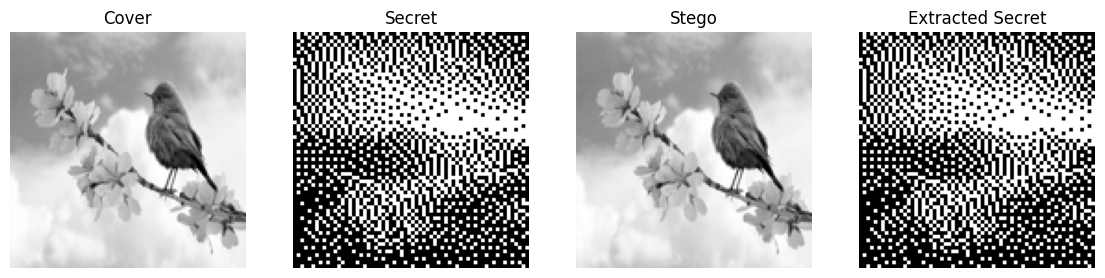


⚛️  Running true quantum NEQR demo on 4×4 block…
Top measurement outcomes (grayscale register):
  000: 1911
  100: 137
⚠️ Matplotlib drawer unavailable, printing ASCII circuit instead:

         ┌───┐                                                                 »
  pos_0: ┤ H ├─────────────────────────────────────────────────────────────────»
         ├───┤                                                                 »
  pos_1: ┤ H ├────────────────────────────────■─────────■─────────■─────────■──»
         ├───┤                                │         │         │         │  »
  pos_2: ┤ H ├────────────■─────────■─────────┼─────────┼─────────■─────────■──»
         ├───┤            │         │         │         │         │         │  »
  pos_3: ┤ H ├───────■────┼─────────■─────────┼─────────■─────────┼─────────■──»
         ├───┤┌───┐  │    │  ┌───┐  │  ┌───┐  │  ┌───┐  │  ┌───┐  │  ┌───┐  │  »
 gray_0: ┤ X ├┤ X ├──┼────┼──┤ X ├──┼──┤ X ├──┼──┤ X ├──┼──┤ X ├──┼──┤ X ├──┼──»
   

In [ ]:
# ===============================================================
# Hybrid Quantum–Inspired + True Quantum NEQR Steganography (v2)
# ===============================================================
# • Upload real COVER and SECRET images
# • Classical NEQR-inspired LSB embedding on full image
# • Quantum 4×4 block demo on Qiskit simulator
# ===============================================================

!pip install --quiet qiskit qiskit_aer pillow matplotlib pylatexenc

from google.colab import files
import numpy as np, math, os
import matplotlib.pyplot as plt
from PIL import Image
from math import log2
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

# ---------- Upload images ----------
print("📂  Upload COVER image")
cover_upload = files.upload()
cover_path = list(cover_upload.keys())[0]
print("📂  Upload SECRET image")
secret_upload = files.upload()
secret_path = list(secret_upload.keys())[0]

# ---------- Utility functions ----------
def psnr(img1, img2, max_pixel=255.0):
    mse = np.mean((img1.astype(float) - img2.astype(float))**2)
    if mse == 0: return float("inf"), 0
    return 10 * math.log10((max_pixel ** 2) / mse), mse

def embed_lsb(cover, secret):  # 1-bit LSB embedding
    return (cover & 0xFE) | secret

def extract_lsb(stego):
    return stego & 1

# ===============================================================
# Part A – Classical NEQR-Inspired Simulation on Full Image
# ===============================================================
target_size = 128
cover = Image.open(cover_path).convert("L").resize((target_size, target_size))
secret = Image.open(secret_path).convert("1").resize((target_size, target_size))
cover_np = np.array(cover)
secret_np = (np.array(secret) > 0).astype(np.uint8)

stego_np = embed_lsb(cover_np, secret_np)
extracted_secret = extract_lsb(stego_np)

psnr_val, mse_val = psnr(cover_np, stego_np)

print("\n📊  Classical (Quantum-Inspired) Results")
print("-----------------------------------------")
print(f"Image size      : {target_size}×{target_size}")
print(f"PSNR            : {psnr_val:.2f} dB")
print(f"MSE             : {mse_val:.4f}")
print(f"Capacity        : 1 bit per pixel")
print("-----------------------------------------")

fig, ax = plt.subplots(1, 4, figsize=(14, 4))
for a, img, title in zip(
    ax,
    [cover_np, secret_np * 255, stego_np, extracted_secret * 255],
    ["Cover", "Secret", "Stego", "Extracted Secret"]
):
    a.imshow(img, cmap="gray"); a.set_title(title); a.axis("off")
plt.show()

os.makedirs("hybrid_output", exist_ok=True)
Image.fromarray(stego_np).save("hybrid_output/stego.png")
Image.fromarray((extracted_secret*255).astype(np.uint8)).save("hybrid_output/extracted_secret.png")

# ===============================================================
# Part B – True Quantum Demo on a 4×4 Block (Qiskit)
# ===============================================================

block = cover_np[:4, :4]
H = 4
secret_bits = extracted_secret[:4, :4].flatten()

print("\n⚛️  Running true quantum NEQR demo on 4×4 block…")

# 4 position qubits (2 for x + 2 for y), 3 grayscale qubits (3-bit gray)
qpos = QuantumRegister(4, "pos")
qgray = QuantumRegister(3, "gray")
cgray = ClassicalRegister(3, "cgray")
qc = QuantumCircuit(qpos, qgray, cgray)

# Step 1 – Superposition of positions
for q in qpos:
    qc.h(q)

# Step 2 – Encode grayscale (NEQR logic)
for y in range(H):
    for x in range(H):
        pos_bits = [(y>>1)&1, y&1, (x>>1)&1, x&1]
        color = int(block[y, x]) >> 5   # 3 MSBs (0–7)
        for bit_index in range(3):
            if (color >> bit_index) & 1:
                controls = [qpos[i] for i,b in enumerate(pos_bits) if b==1]
                if controls: qc.mcx(controls, qgray[bit_index])
                else: qc.x(qgray[bit_index])

# Step 3 – Embed secret bits → flip LSB if secret bit = 1
for s in secret_bits:
    if s == 1:
        qc.x(qgray[0])

# Step 4 – Measure
qc.measure(qgray, cgray)

backend = Aer.get_backend("qasm_simulator")
job = backend.run(qc, shots=2048)
counts = job.result().get_counts()

print("Top measurement outcomes (grayscale register):")
for k,v in sorted(counts.items(), key=lambda kv: kv[1], reverse=True)[:8]:
    print(f"  {k}: {v}")

plot_histogram(counts)
plt.show()

# ---------- Draw circuit safely ----------
try:
    qc.draw("mpl")
except Exception as e:
    print("⚠️ Matplotlib drawer unavailable, printing ASCII circuit instead:\n")
    print(qc.draw())


📂 Please upload your COLOR COVER image (RGB preferred)


Saving nature.jpg to nature.jpg
📂 Please upload your SECRET image (can be color or grayscale)


Saving bird-color64.jpeg to bird-color64.jpeg

📊 Quantum-Inspired GNEQR Steganography Comparison
--------------------------------------------------
Bits/Channel   PSNR (dB)   MSE       Capacity (bpp) 
1              51.16       0.4982    3              
2              43.61       2.8290    6              
3              37.26       12.2277   9              
--------------------------------------------------


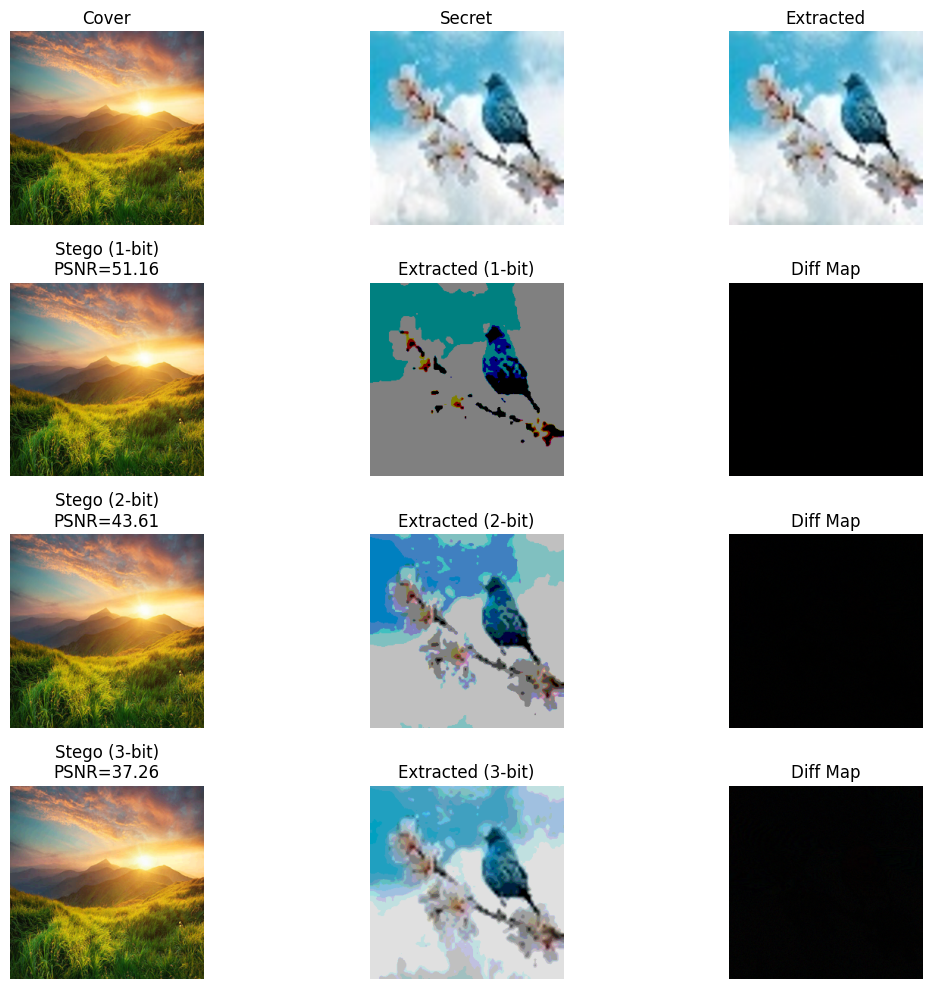

✅ Results saved in 'GNEQR_Comparison_Output/' folder.


In [ ]:
# ===============================================================
# Quantum-Inspired GNEQR Image Steganography (Comparison Version, Fixed)
# ===============================================================

!pip install --quiet pillow matplotlib numpy

from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import math, os

# ---------- Upload ----------
print("📂 Please upload your COLOR COVER image (RGB preferred)")
cover_upload = files.upload()
cover_path = list(cover_upload.keys())[0]

print("📂 Please upload your SECRET image (can be color or grayscale)")
secret_upload = files.upload()
secret_path = list(secret_upload.keys())[0]

# ---------- Helper Functions ----------
def psnr(img1, img2, max_pixel=255.0):
    mse = np.mean((img1.astype(float) - img2.astype(float))**2)
    if mse == 0: return float("inf"), 0
    return 10 * math.log10((max_pixel ** 2) / mse), mse

def embed_lsb_color(cover, secret, bits=1):
    """Embed lower 'bits' of secret into cover per color channel (safe version)."""
    cover16 = cover.astype(np.uint16)
    secret16 = secret.astype(np.uint16)
    mask_cover = np.uint16(0xFF << bits) & 0xFF  # clear lower bits safely
    secret_shift = 8 - bits
    stego = ((cover16 & mask_cover) | (secret16 >> secret_shift)).astype(np.uint8)
    return stego

def extract_lsb_color(stego, bits=1):
    """Extract secret from stego using lower 'bits' per channel."""
    stego16 = stego.astype(np.uint16)
    extracted = ((stego16 & ((1 << bits) - 1)) << (8 - bits)).astype(np.uint8)
    return extracted

# ---------- Load & Resize ----------
target_size = (256, 256)
cover = Image.open(cover_path).convert("RGB").resize(target_size)
secret = Image.open(secret_path).convert("RGB").resize(target_size)
cover_np = np.array(cover)
secret_np = np.array(secret)

# ---------- Quantum-Inspired GNEQR Simulation ----------
results = []
for bits in [1, 2, 3]:
    stego = embed_lsb_color(cover_np, secret_np, bits)
    extracted = extract_lsb_color(stego, bits)
    psnr_val, mse_val = psnr(cover_np, stego)
    results.append((bits, psnr_val, mse_val, stego, extracted))

# ---------- Display PSNR Table ----------
print("\n📊 Quantum-Inspired GNEQR Steganography Comparison")
print("--------------------------------------------------")
print(f"{'Bits/Channel':<15}{'PSNR (dB)':<12}{'MSE':<10}{'Capacity (bpp)':<15}")
for bits, psnr_val, mse_val, _, _ in results:
    capacity = 3 * bits
    print(f"{bits:<15}{psnr_val:<12.2f}{mse_val:<10.4f}{capacity:<15}")
print("--------------------------------------------------")

# ---------- Visualize ----------
fig, axes = plt.subplots(4, 3, figsize=(12, 10))
titles = ["Cover", "Secret", "Extracted"]
for ax, img, title in zip(axes[0], [cover_np, secret_np, secret_np], titles):
    ax.imshow(img); ax.set_title(title); ax.axis("off")

for i, (bits, psnr_val, mse_val, stego, extracted) in enumerate(results, start=1):
    axes[i][0].imshow(stego)
    axes[i][0].set_title(f"Stego ({bits}-bit)\nPSNR={psnr_val:.2f}")
    axes[i][0].axis("off")

    axes[i][1].imshow(extracted)
    axes[i][1].set_title(f"Extracted ({bits}-bit)")
    axes[i][1].axis("off")

    diff = np.abs(cover_np.astype(int) - stego.astype(int))
    axes[i][2].imshow(diff)
    axes[i][2].set_title("Diff Map")
    axes[i][2].axis("off")

plt.tight_layout()
plt.show()

# ---------- Save Outputs ----------
os.makedirs("GNEQR_Comparison_Output", exist_ok=True)
for bits, _, _, stego, extracted in results:
    Image.fromarray(stego.astype(np.uint8)).save(f"GNEQR_Comparison_Output/stego_{bits}bit.png")
    Image.fromarray(extracted.astype(np.uint8)).save(f"GNEQR_Comparison_Output/extracted_{bits}bit.png")

print("✅ Results saved in 'GNEQR_Comparison_Output/' folder.")
